<a href="https://colab.research.google.com/github/tithi31-rgb/P2P_Solar_Microgrid_App/blob/main/AI_Solar_Energy_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os

directory_path = '//content/drive/MyDrive/minor project/archive (12)'
print(f"Contents of the directory '{directory_path}':")
print(os.listdir(directory_path))

# After inspecting the output, update 'file_path' to point to the actual CSV file
# For example: file_path = f'{directory_path}/your_file_name.csv'
# data = pd.read_csv(file_path)
# data.head()

Contents of the directory '//content/drive/MyDrive/minor project/archive (12)':
['Plant_2_Generation_Data.csv', 'Plant_1_Generation_Data.csv', 'Plant_1_Weather_Sensor_Data.csv', 'Plant_2_Weather_Sensor_Data.csv']


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
file_path = '/content/drive/MyDrive/minor project/archive (12)/Plant_1_Generation_Data.csv'

data = pd.read_csv(file_path)
data.head()


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [ ]:
data = data[['DATE_TIME', 'AC_POWER']]
data.head()


,DATE_TIME,AC_POWER
0,15-05-2020 00:00,0.0
1,15-05-2020 00:00,0.0
2,15-05-2020 00:00,0.0
3,15-05-2020 00:00,0.0
4,15-05-2020 00:00,0.0


In [ ]:
data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'])
data = data.dropna()
data.head()


/tmp/ipython-input-129107771.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'])


,DATE_TIME,AC_POWER
0,2020-05-15,0.0
1,2020-05-15,0.0
2,2020-05-15,0.0
3,2020-05-15,0.0
4,2020-05-15,0.0


In [ ]:
data = data.reset_index(drop=True)
data['Hour_Index'] = data.index
data['DATE_TIME'] = data['DATE_TIME'] + pd.to_timedelta(data['Hour_Index'], unit='h')


In [ ]:
data['Hour'] = data['DATE_TIME'].dt.hour
data['Day'] = data['DATE_TIME'].dt.day
data['Month'] = data['DATE_TIME'].dt.month

data.head()


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Hour_Index,Hour,Day,Month
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,0,0,15,5
1,2020-05-15 01:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,1,1,15,5
2,2020-05-15 02:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2,2,15,5
3,2020-05-15 03:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,3,3,15,5
4,2020-05-15 04:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,4,4,15,5


In [ ]:
X = data[['Hour', 'Day', 'Month']]
y = data['AC_POWER']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 342.6178152326295
RMSE: 392.8828019805991


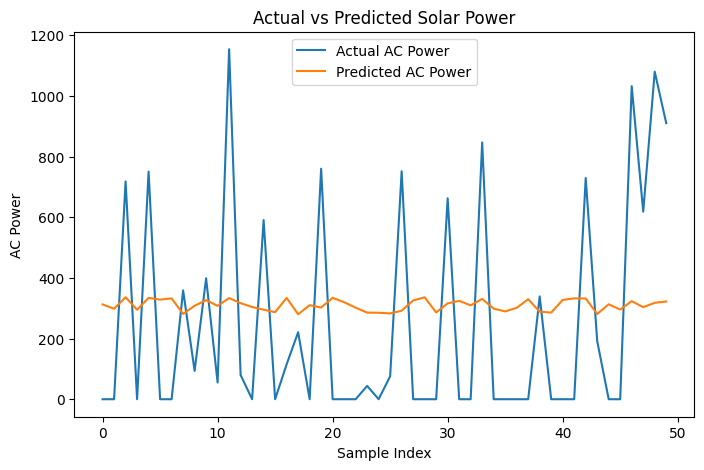

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(y_test.values[:50], label='Actual AC Power')
plt.plot(y_pred[:50], label='Predicted AC Power')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('AC Power')
plt.title('Actual vs Predicted Solar Power')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
rf_pred = rf_model.predict(X_test)


In [ ]:
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print("Random Forest MAE:", rf_mae)
print("Random Forest RMSE:", rf_rmse)


Random Forest MAE: 48.62416979290094
Random Forest RMSE: 93.63838572592229


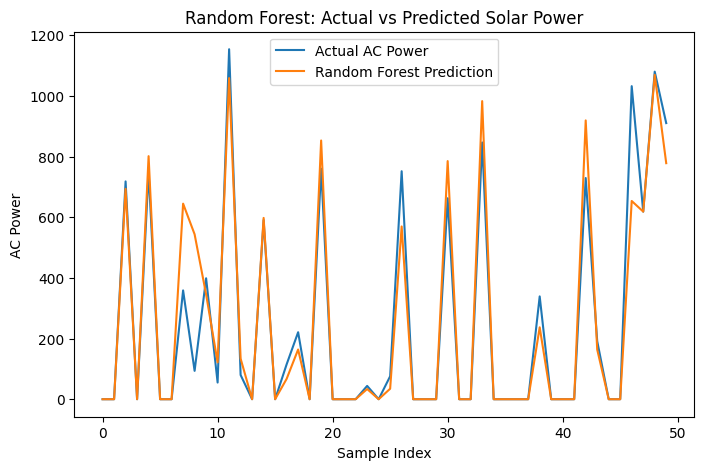

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_test.values[:50], label='Actual AC Power')
plt.plot(rf_pred[:50], label='Random Forest Prediction')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('AC Power')
plt.title('Random Forest: Actual vs Predicted Solar Power')
plt.show()


In [ ]:
print("Linear Regression RMSE:", rmse)
print("Random Forest RMSE:", rf_rmse)


Linear Regression RMSE: 392.78597512098764
Random Forest RMSE: 93.63838572592229


In [ ]:
future_data = pd.DataFrame({
    'Hour': [10, 11, 12, 13, 14],
    'Day': [15, 15, 15, 15, 15],
    'Month': [1, 1, 1, 1, 1]
})

future_power = rf_model.predict(future_data)
future_power


array([645.80484933, 749.79911973, 862.5503244 , 694.79309741,
       904.32947137])

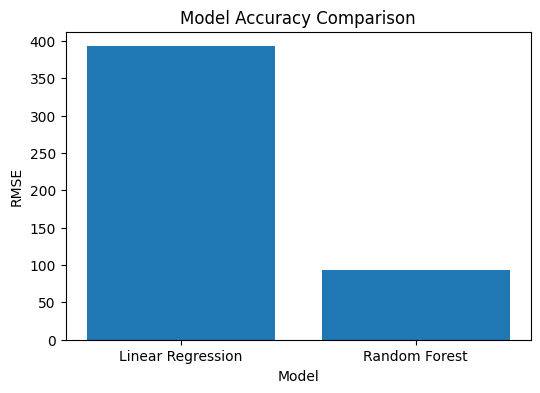

In [ ]:
models = ['Linear Regression', 'Random Forest']
rmse_values = [rmse, rf_rmse]

plt.figure(figsize=(6,4))
plt.bar(models, rmse_values)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Model Accuracy Comparison')
plt.show()


In [ ]:
future_df = future_data.copy()
future_df['Predicted_AC_Power'] = future_power
future_df


,Hour,Day,Month,Predicted_AC_Power
0,10,15,1,645.804849
1,11,15,1,749.799120
2,12,15,1,862.550324
3,13,15,1,694.793097
4,14,15,1,904.329471


In [ ]:
# Reload Plant-1
data = pd.read_csv('/content/drive/MyDrive/minor project/archive (12)/Plant_1_Generation_Data.csv')
data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'])

# Reload Plant-2
data2 = pd.read_csv('/content/drive/MyDrive/minor project/archive (12)/Plant_2_Generation_Data.csv')
data2['DATE_TIME'] = pd.to_datetime(data2['DATE_TIME'])


/tmp/ipython-input-91680553.py:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'])


In [ ]:
merged = pd.merge(
    data[['DATE_TIME', 'AC_POWER']],
    data2[['DATE_TIME', 'AC_POWER']],
    on='DATE_TIME',
    suffixes=('_P1', '_P2')
)

merged.head()



,DATE_TIME,AC_POWER_P1,AC_POWER_P2
0,2020-05-15,0.0,0.0
1,2020-05-15,0.0,0.0
2,2020-05-15,0.0,0.0
3,2020-05-15,0.0,0.0
4,2020-05-15,0.0,0.0


In [ ]:
LOAD = 200

merged['Surplus_P1'] = merged['AC_POWER_P1'] - LOAD
merged['Deficit_P2'] = LOAD - merged['AC_POWER_P2']

merged.head()


,DATE_TIME,AC_POWER_P1,AC_POWER_P2,Surplus_P1,Deficit_P2
0,2020-05-15,0.0,0.0,-200.0,200.0
1,2020-05-15,0.0,0.0,-200.0,200.0
2,2020-05-15,0.0,0.0,-200.0,200.0
3,2020-05-15,0.0,0.0,-200.0,200.0
4,2020-05-15,0.0,0.0,-200.0,200.0


In [ ]:
merged['Credits_Earned'] = merged['Surplus_P1'].apply(lambda x: x if x > 0 else 0)
merged['Credits_Used'] = merged['Deficit_P2'].apply(lambda x: x if x > 0 else 0)


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


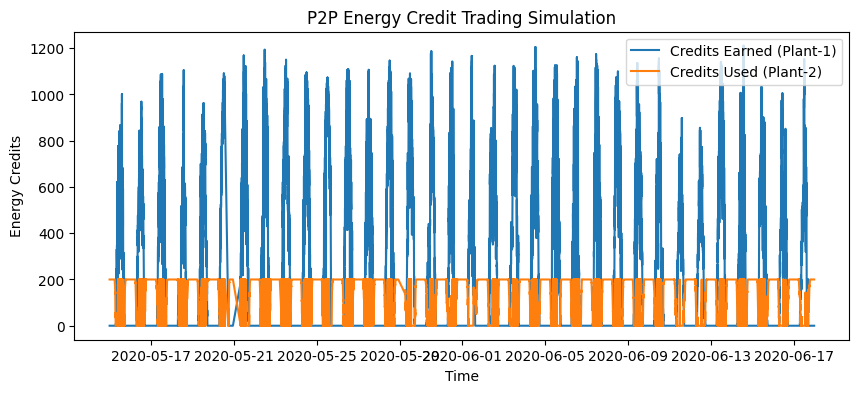

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(merged['DATE_TIME'], merged['Credits_Earned'], label='Credits Earned (Plant-1)')
plt.plot(merged['DATE_TIME'], merged['Credits_Used'], label='Credits Used (Plant-2)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Energy Credits')
plt.title('P2P Energy Credit Trading Simulation')
plt.show()
